<a href="https://colab.research.google.com/github/Scaicedo46/Solid-engine/blob/master/TrainData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Science Project
 by *Santana Caicedo*

##Data Collection

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/drive/My Drive/Train.csv')
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,0.8010,-0.6192,13.6380,1.2589,8.1939,14.9894,12.0763,-1.4710,6.7341,14.8241,19.7172,11.9882,1.0468,3.8663,4.7252,13.9427,-1.2796,-4.3763,5.1494,0.4124,-5.0732,4.9010,1.5459,15.6423,10.7209,15.1886,1.8685,7.7223,...,16.5552,5.3739,6.4487,11.5631,1.3847,14.9638,2.8455,-9.0953,3.8278,

Note: Taking a first glance at our data set to understand what we are looking at and see what needs to be cleaned or adjusted.

##Data Cleaning

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


After looking at what data types are in the DF how much memory they contain to give us an idea how much data we are working with.

In [4]:
train.describe

<bound method NDFrame.describe of              ID_code  target    var_0  ...  var_197  var_198  var_199
0            train_0       0   8.9255  ...   8.5635  12.7803  -1.0914
1            train_1       0  11.5006  ...   8.7889  18.3560   1.9518
2            train_2       0   8.6093  ...   8.2675  14.7222   0.3965
3            train_3       0  11.0604  ...  10.2922  17.9697  -8.9996
4            train_4       0   9.8369  ...   9.5031  17.9974  -8.8104
...              ...     ...      ...  ...      ...      ...      ...
199995  train_199995       0  11.4880  ...   8.5326  16.6660 -17.8661
199996  train_199996       0   4.9149  ...   6.7419  15.9054   0.3388
199997  train_199997       0  11.2232  ...   8.7155  13.8329   4.1995
199998  train_199998       0   9.7148  ...  10.0342  15.5289 -13.9001
199999  train_199999       0  10.8762  ...   8.1857  12.1284   0.1385

[200000 rows x 202 columns]>

In [5]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Note:0 = Unsuccessful transaction, 1 = Successful transaction.The dataframe shows they had almost 8 times more Unsuccessful transactions

Suggestions on how make data cleaning easier  
-Dividing up the groups in to unsuccessful transactions and successful transactions to test them against each other  
-Create a data frame with even numbers of transactions so prediction models can be tested better.

##Exploratory Data Analysis



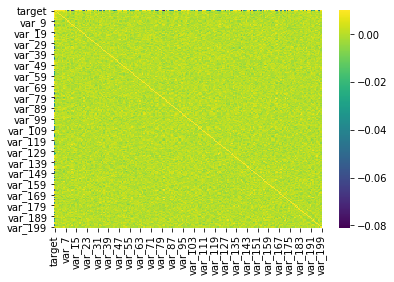

In [6]:
sns.heatmap(train.corr(), cmap='viridis', annot=False, vmax=.01)

Note:There are too many variables to distinguish correlation.

Text(0.5, 1.0, 'var-1 vs var_2 scatter plot')

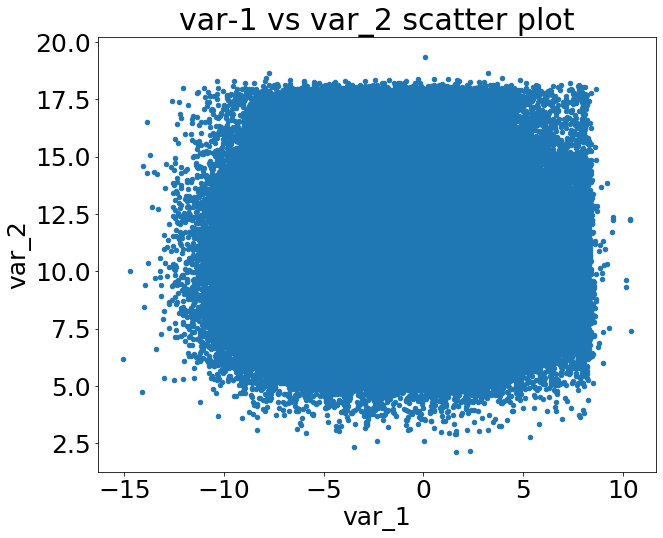

In [7]:
plt.rcParams.update({'font.size':25, 'figure.figsize': (10,8)})
train.plot(kind='scatter', x='var_1', y='var_2', )
plt.title('var-1 vs var_2 scatter plot')

Note: A scatter plot of two variables has too many data points to have any predictive power.

Text(0.5, 1.0, 'Var_1 Distribution Plot')

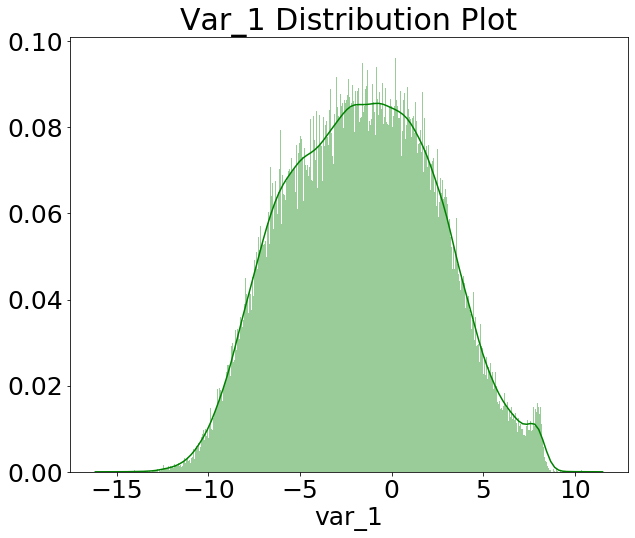

In [8]:
sns.distplot(train['var_1'], color='g', bins=1000,hist_kws={'alpha': 0.4})
plt.title('Var_1 Distribution Plot')

Note: A distribution plot also contains too many data points 

In [9]:
print(train.isnull().values.any())
print(train.isnull().sum().sum())

False
0


Note: Here is proof that there are no NaN value and the data is clean enough to start working with.

In [10]:
train_success= train.loc[train['target']==1]
train_unsuccessful= train.loc[train['target']==0,]

print(train_success['target'].value_counts())
print(train_unsuccessful['target'].value_counts())

1    20098
Name: target, dtype: int64
0    179902
Name: target, dtype: int64


Note: splitting the data frame into seperate data frames .  
 1=Successful transactions and 0=Unsuccessful transaction, and the verification of only 1's or 0's.


In [11]:
print(type(train_success))
print(type(train_unsuccessful))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Note: Confirming that my new dataframes are actually data frames and not arrays

In [12]:
train_success.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,8.6978,2.3287,-11.3409,13.7999,2.7925,6.3182,14.7313,7.2594,-2.4759,14.3984,9.1793,16.8467,19.4258,1.6565,2.5107,7.1272,13.6444,-12.8761,-1.0136,5.1773,7.3507,-16.0042,6.4460,-3.3238,14.3372,10.9481,6.7386,-0.5110,4.4335,...,32.5287,5.8451,4.9591,11.7805,-7.0936,11.8863,3.2597,-4.3478,7.5711,5.6656,3.5750,-8.6583,20.3131,-2.2723,15.7383,8.1730,-12.4963,15.1929,3.9751,8.5618,2.4566,9.3694,0.6942,11.9694,11.8982,0.6129,10.8123,-1.0803,11.9586,-0.5899,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,9.1168,6.8278,1.3898,14.0957,12.3335,9.0616,14.8726,11.3542,5.2004,1.6610,24.3097,3.1983,13.0446,4.3067,2.1315,7.9501,13.9981,-12.6789,-0.7712,5.9889,2.1959,-16.2435,10.9816,-3.2509,7.8550,11.2951,14.3999,2.3497,6.4171,...,11.6782,5.3495,5.1066,17.7215,-5.1919,19.0355,2.7651,-7.4054,6.3445,5.4183,8.6643,-10.3910,21.0844,4.1428,4.7056,8.5329,9.4661,9.6265,9.0617,4.3694,-1.1399,10.9190,-3.9144,8.1388,16.4554,4.7923,9.1281,-21.7322,18.6375,0.1734,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
63,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,1.3999,6.6710,-5.1448,11.0835,14.0503,9.0144,8.8346,14.8138,5.0951,-1.6585,-2.3445,24.4873,9.4153,23.5101,9.3373,2.1534,11.1901,13.2911,-5.2299,-2.5387,4.1148,9.1110,-14.6391,12.8946,-0.9446,6.1225,10.8937,6.4271,0.7646,7.0633,...,22.5924,5.3977,3.3740,13.0953,3.0745,16.6974,2.0576,5.5558,3.1795,6.0669,2.5841,7.0790,13.1299,2.2445,23.1283,8.9796,-13.6216,10.5579,6.9716,2.9384,-7.2040,9.7592,15.1720,5.2335,27.6213,-9.2779,5.1130,-13.0577,10.0679,1.9046,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
65,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,5.8204,9.0358,-10.7504,7.7587,13.6021,4.2864,8.1159,14.0805,5.1303,4.0575,13.8723,16.9321,14.0983,2.2106,3.9192,2.8896,9.2493,13.5054,-0.4275,-3.2016,6.9686,0.8920,-16.6872,12.0119,0.8354,13.6590,11.7710,8.6702,2.3624,6.5731,...,25.3377,5.8066,5.2234,11.3098,-6.7546,30.5059,2.6117,-3.3249,4.7747,6.1149,2.2550,-0.5348,4.5535,-7.2104,19.7545,9.1091,-0.4833,13.7686,3.8680,6.3190,0.9670,12.9782,2.5409,13.7491,11.9410,2.8503,8.2088,-4.6266,10.2542,1.5517,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
71,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,-1.8922,9.1282,-11.4237,-8.6036,13.9394,3.6480,5.0944,14.4429,9.2046,-4.3236,24.2658,13.5924,16.0715,33.3687,9.6420,2.2948,4.1684,13.3240,-2.8896,-3.2697,3.9168,4.3874,-7.1606,10.7617,-1.5133,7.8835,10.7454,9.3655,3.7260,4.6904,...,29.8664,5.7714,4.3278,15.8608,2.9925,13.3188,3.2917,-3.4176,6.6747,5.0565,11.9429,7.7473,8.6512,0.3140,20.4828,8.9715,-3.0613,12.5752,-14.9327,7.9488,9.3111,7.3559,3.7889,15.9203,11.2587,-0.7797,5.1381,6.1459,13.8773,-0.0899,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447


In [13]:
train_unsuccessful.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [14]:
print(train_success['var_1'].describe())
print(train_unsuccessful['var_1'].describe())

count    20098.000000
mean        -1.017613
std          4.220638
min        -14.037000
25%         -4.203475
50%         -0.992650
75%          2.001375
max          9.029800
Name: var_1, dtype: float64
count    179902.000000
mean         -1.695770
std           4.024813
min         -15.043400
25%          -4.790775
50%          -1.682600
75%           1.287700
max          10.376800
Name: var_1, dtype: float64


Note: Examining for any correlations in 'var_1' between successful and unsuccessful transactions.

In [15]:
train_success_mean = np.mean(train_success)
train_success_mean.head()

target     1.000000
var_0     11.156418
var_1     -1.017613
var_2     11.156633
var_3      6.864113
dtype: float64

Note: Getting the mean of each of my 'var_' columns in successful transactions

In [16]:
train_success_std = train_success.std(axis = 0, skipna=True)
train_success_std.head()

target    0.000000
var_0     3.270293
var_1     4.220638
var_2     2.841075
var_3     2.070898
dtype: float64

Note: Getting the standard deviation(std) of each of my 'var_' columns in successful transactions

In [17]:
  
train_unsuccessful_mean = np.mean(train_unsuccessful)
train_unsuccessful_mean.head()

target     0.000000
var_0     10.626681
var_1     -1.695770
var_2     10.665876
var_3      6.788979
dtype: float64

Getting the mean of each of my 'var_' columns for unsuccessful transactions

In [18]:
train_unsuccessful_std = train_unsuccessful.std(axis = 0, skipna=True)
train_unsuccessful_std.head()

target    0.000000
var_0     3.008564
var_1     4.024813
var_2     2.612961
var_3     2.040082
dtype: float64

Note: Getting the standard deviation(std) of each of my 'var_' columns in unsuccessful transactions

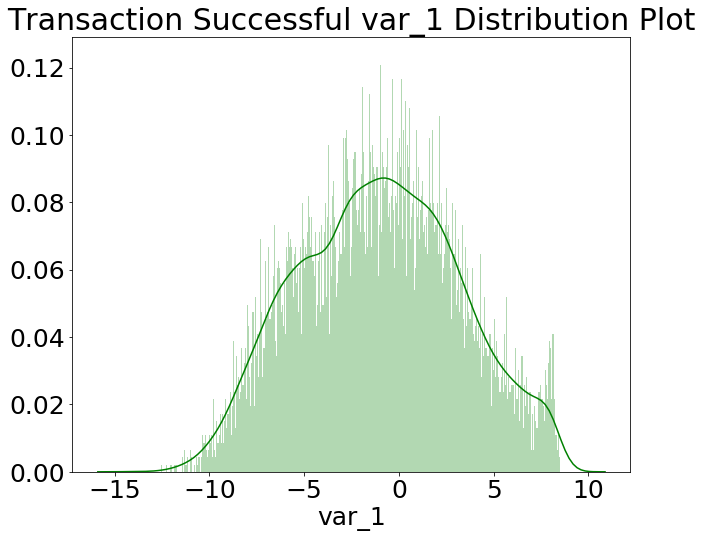

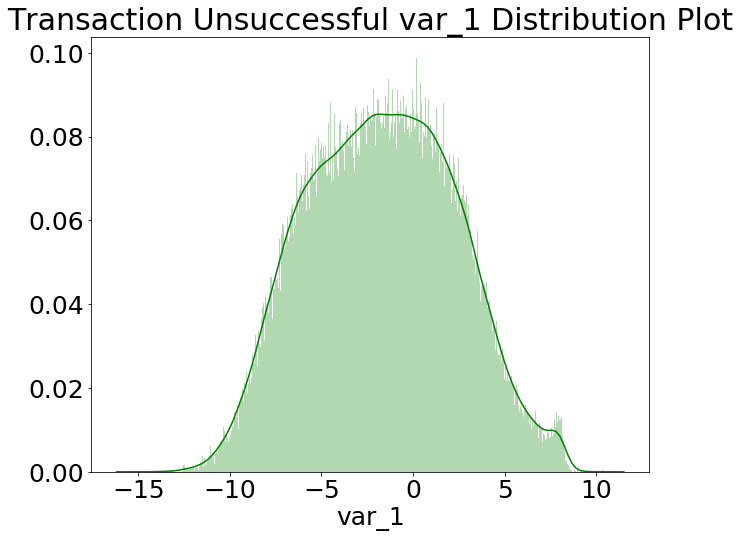

In [19]:
sns.distplot(train_success['var_1'], color='g', bins=1000,hist_kws={'alpha': 0.3})
plt.title('Transaction Successful var_1 Distribution Plot')
plt.show()

sns.distplot(train_unsuccessful['var_1'], color='g', bins=1000,hist_kws={'alpha': 0.3})
plt.title('Transaction Unsuccessful var_1 Distribution Plot')
plt.show()

Note: These distribution plots give us a better look at what var_1 looks like in Successful transactions compared to Unsuccessful transactions .

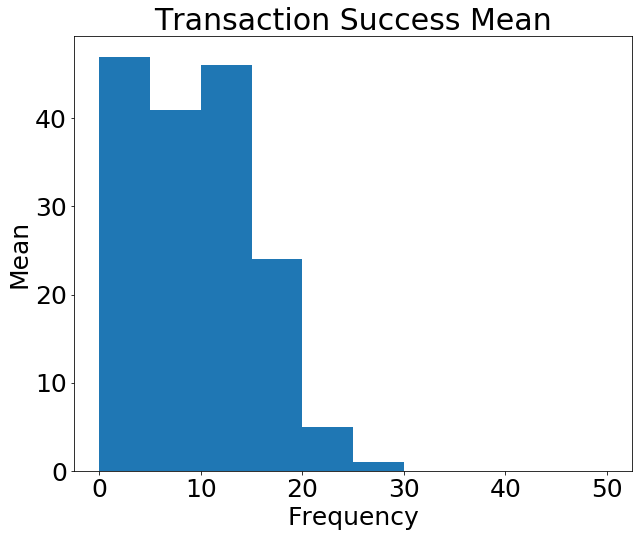

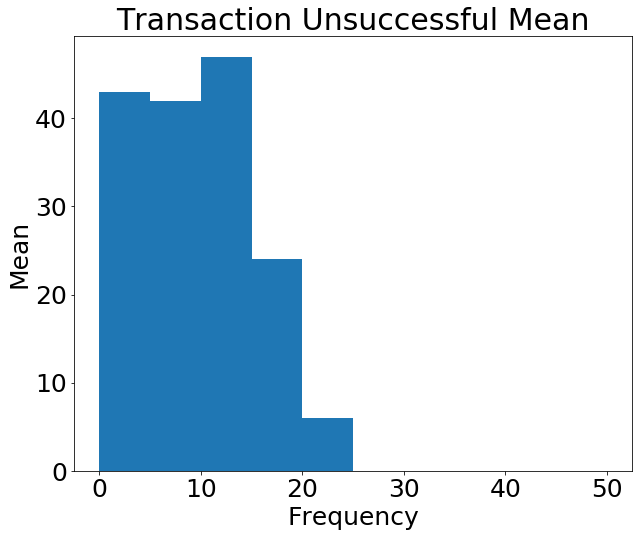

In [20]:
train_success_mean.plot(kind='hist', range=[0,50])
plt.title('Transaction Success Mean')
plt.xlabel('Frequency')
plt.ylabel('Mean')
plt.show();

train_unsuccessful_mean.plot(kind='hist', range=[0,50])
plt.title('Transaction Unsuccessful Mean')
plt.xlabel('Frequency')
plt.ylabel('Mean')
plt.show();

Note: These graphs are the mean plots of Unsuccessful and Successful transactions!

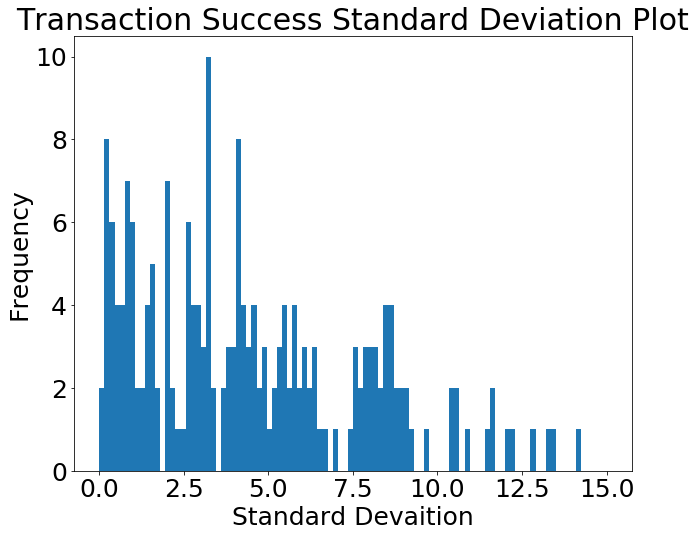

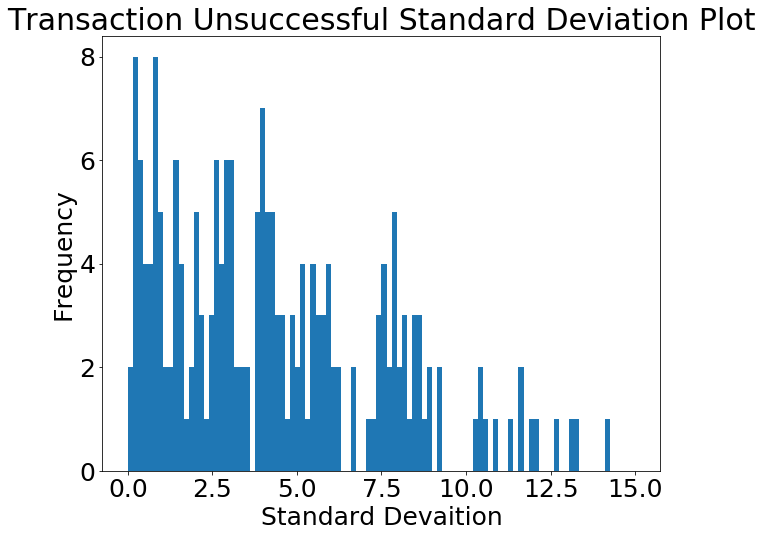

In [21]:
train_success_std.plot(kind='hist', bins=100, range=[0,15])
plt.title('Transaction Success Standard Deviation Plot')
plt.xlabel('Standard Devaition')
plt.show()
train_unsuccessful_std.plot(kind='hist' ,bins=100, range=[0,15])
plt.title('Transaction Unsuccessful Standard Deviation Plot')
plt.xlabel('Standard Devaition')
plt.show()

Note: The graphs above shows the standard deviation of Unsuccessful and Successful transactions but its difficult to deduce any information because of the amount of variables

In [22]:
train_nb = train.drop(['ID_code', 'target'], axis=1)
train_nb.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,1.4450,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Note: Here I dropped the target and ID_code columns so i can put into a naive bayes machine 

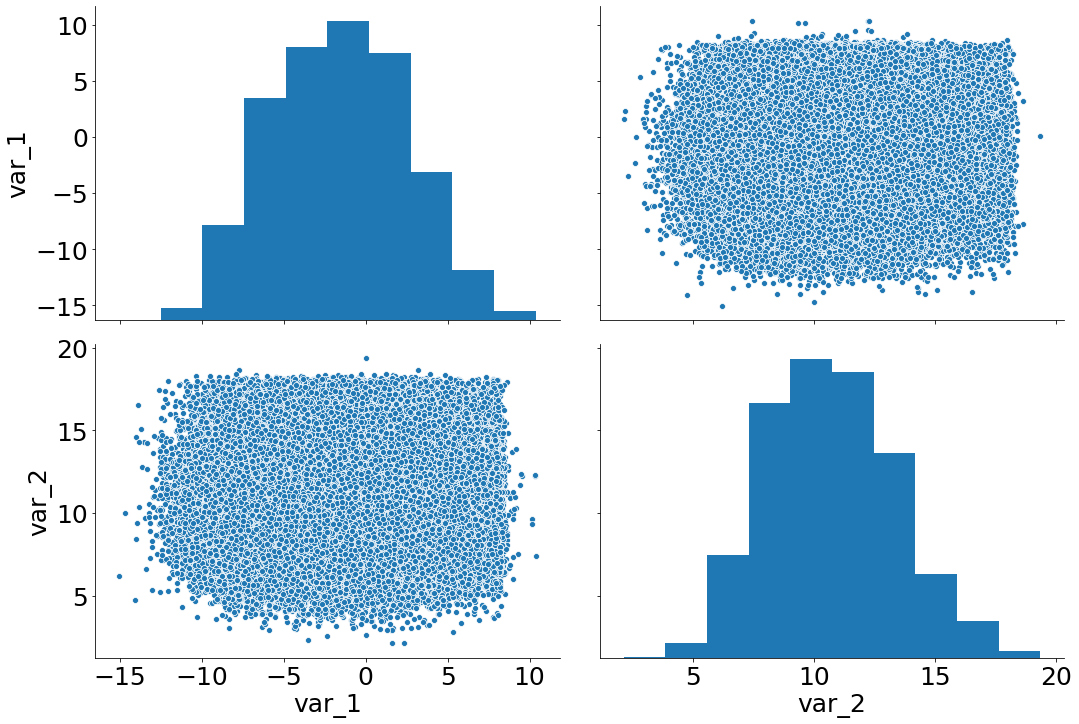

In [23]:
sns.pairplot(train_nb, aspect=1.5, height=5, vars=['var_1','var_2'])

Note: There are too many varibales you get a realitvely similar graph because of the massive amounts of data points

In [24]:
train_nb._is_view

False

Note: Verification they are copies not slices

**Here I start the process of making a correlation DF to see if i have any correlations in my train_nb DF**

In [0]:
train_nb_corr = train_nb.corr()

In [26]:
train_nb_corr1 = train_nb_corr.unstack()
train_corr1 = train_nb_corr1.sort_values(kind='quicksort', ascending=False)

train_corr1_complete = train_corr1[train_corr1<1]
print(train_corr1_complete[1:10])

var_165  var_81     0.009714
var_81   var_174    0.009490
var_174  var_81     0.009490
var_183  var_189    0.009359
var_189  var_183    0.009359
var_169  var_146    0.009071
var_146  var_169    0.009071
var_132  var_122    0.008956
var_122  var_132    0.008956
dtype: float64


Note: In this code block we took all the correlated variables and organized them the took all that are below 1 so we can exclude variables that are the same. Example( Var_1 and Var_1 will have perfect correlation because they are the same variable)

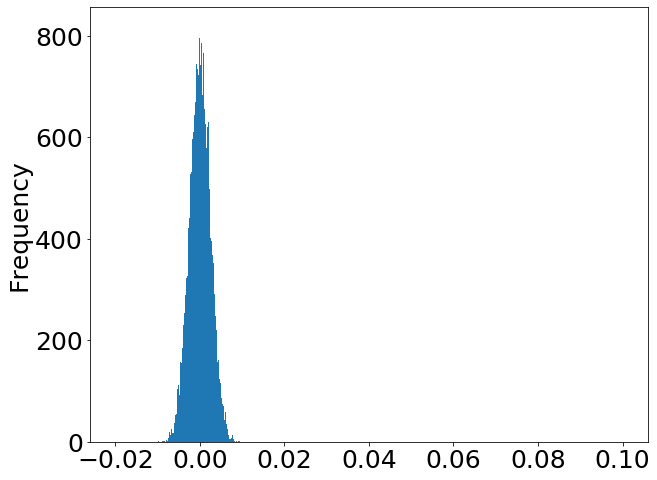

In [27]:
train_corr1_complete.plot(kind='hist', bins=1000, range=[-0.02,0.1])

Note: train_corr1_complete plots all variables in all the sucecessful transactions and shows no correlation which means we can use naive bayes!


**Now I import all the functions I need to start naivee bayes**

In [0]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection as model_selection

In [29]:
train_target = train['target'] 
train_target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Note: Since I have a train df with only variables (train_nb) now I need a dataframe with only the targets

##Data Processing

In [30]:
model = GaussianNB()
model.fit(train_nb, train_target)

GaussianNB(priors=None, var_smoothing=1e-09)

Note: Here I created a model and then train the model to the two dataframes I created

In [31]:
print(metrics.confusion_matrix(train_target, model.predict(train_nb)))

[[176960   2942]
 [ 12718   7380]]


Note: Here I create a confusion matrix for the model of target to data, to see what results it gives with the data I trained it to

In [32]:
print('Accuracy:', metrics.accuracy_score(train_target, model.predict(train_nb)))

Accuracy: 0.9217


In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_nb, train_target, test_size=0.25)

In [34]:
X_train.shape

(150000, 200)

In [35]:
X_test.shape

(50000, 200)

In [36]:
y_train.shape

(150000,)

In [37]:
y_test.shape

(50000,)

So here I can verify the amount of training data and the amount of testing data. With all that information now I want to make a prediction machine and test its accuracy, so I can see if I need to adjust the test or training size

##Data Visualization/Communicating Results 

In [38]:
for idx in range(10):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(train_nb, train_target, test_size=0.25)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.91902
Accuracy: 0.9237
Accuracy: 0.92048
Accuracy: 0.91928
Accuracy: 0.92066
Accuracy: 0.92182
Accuracy: 0.92232
Accuracy: 0.92254
Accuracy: 0.91872
Accuracy: 0.92228


Note: I create a loop where I take my training model selection and create a prediction machine to test different test sizes

In [39]:
test_Sizes = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, .99])
test_acc = np.zeros(len(test_Sizes))
test_acc_mean = np.zeros(len(test_Sizes))
for idx2, test_size_idx in enumerate(test_Sizes):
  for idx1 in range(len(test_Sizes)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(train_nb, train_target, test_size=test_size_idx)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_acc[idx1] = metrics.accuracy_score(y_test,y_pred)
  test_acc_mean[idx2] = np.mean(test_acc)
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9087272727272727


Note: Now building off the previous loop I perform predictions on my testing set across an array of numbers, to see where my prediction percentage is the best!

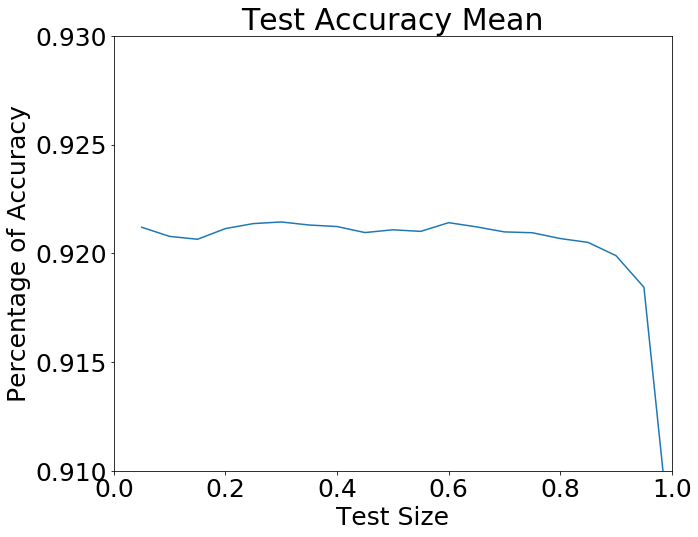

In [40]:
plt.plot(test_Sizes, test_acc_mean)
plt.title('Test Accuracy Mean')
plt.xlabel('Test Size')
plt.ylabel('Percentage of Accuracy')
plt.axis([0,1,0.91, 0.93]);

Note: This graph shows how the test accuracy drops as larger the test size given to it

In [41]:
for idx in range(10):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(train_nb, train_target, test_size=0.70)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  print('Accuracy:', metrics.accuracy_score(y_train,y_pred))

Accuracy: 0.9211333333333334
Accuracy: 0.9229666666666667
Accuracy: 0.9221
Accuracy: 0.9240166666666667
Accuracy: 0.9226
Accuracy: 0.9215833333333333
Accuracy: 0.9235166666666667
Accuracy: 0.9236833333333333
Accuracy: 0.9222
Accuracy: 0.9202166666666667


Here I perform the same loop but against my training set, and I see giving me better results than my testing set.

In [42]:
test_Sizes = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, .99])
train_acc = np.zeros(len(test_Sizes))
train_acc_mean = np.zeros(len(test_Sizes))
for idx2, test_size_idx in enumerate(test_Sizes):
  for idx1 in range(len(test_Sizes)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(train_nb, train_target, test_size=test_size_idx)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    train_acc[idx1] = metrics.accuracy_score(y_train,y_pred)
  train_acc_mean[idx2] = np.mean(train_acc)
print('Accuracy:', metrics.accuracy_score(y_train,y_pred))

Accuracy: 0.9435


Note: As I noted before now I take previous loop then perform predictions on my testing set across an array of numbers, to see where my prediction percentage is the best!

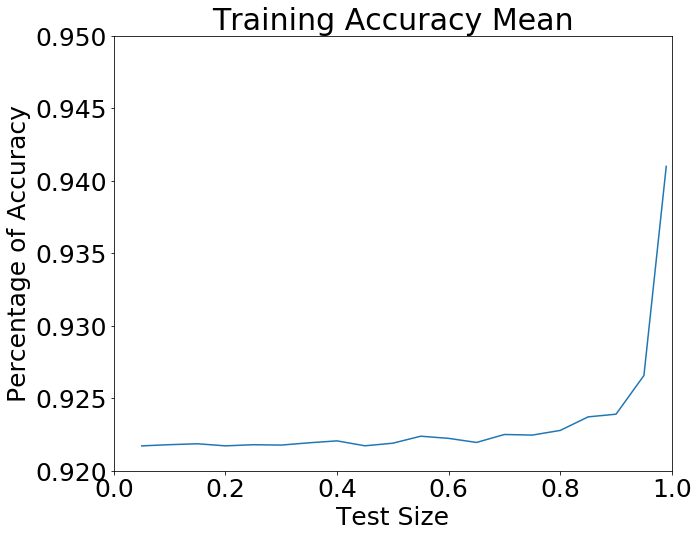

In [43]:
plt.plot(test_Sizes, train_acc_mean)
plt.title('Training Accuracy Mean')
plt.xlabel('Test Size')
plt.ylabel('Percentage of Accuracy')
plt.axis([0,1,0.92, 0.95]);

Note: The larger the training size is, the higher percentage of accuracy 



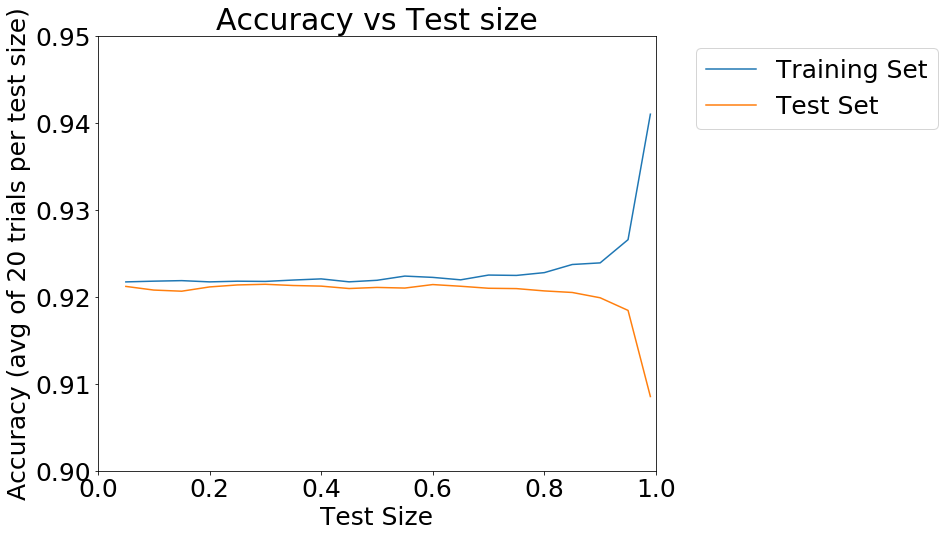

In [44]:
plt.plot(test_Sizes,train_acc_mean, label='Training Set')
plt.plot(test_Sizes,test_acc_mean, label='Test Set')
plt.title('Accuracy vs Test size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy (avg of 20 trials per test size)')
plt.axis([0,1, 0.90,0.95])
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()


Note: The graph above shows us that the convergance point is somewhere in between 0.6-0.7 and that is the location where we can get the highest probablitly without misleading my prediction model.

#Finishing Project

In [0]:
testSet= pd.read_csv('/content/drive/My Drive/Test.csv')
del testSet['ID_code']

In [0]:
model.fit(X_train, y_train)
testSet_pred = model.predict(testSet)

In [0]:
submissionDF = pd.read_csv('/content/drive/My Drive/Copy of sample_submission.csv')

In [48]:
submissionDF.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [0]:
submissionDF['target']= testSet_pred
submissionDF.to_csv('/content/drive/My Drive/Copy of sample_submission.csv', index=False)